# Automatic Recognation and Interpretation of handwritten numbers in the photo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # import mnist dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784', parser='auto')
mnist.data.shape

(70000, 784)

###### Define function to see numbers' photos in Mnist dataset

In [3]:
def showimage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image, cmap = 'binary')
    plt.axis('off')
    plt.show()

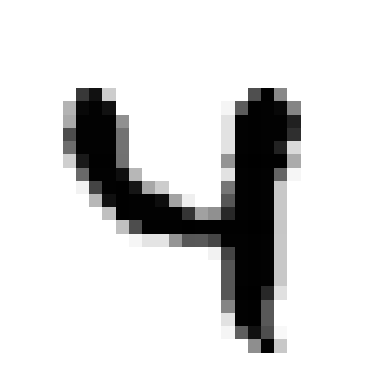

In [4]:
# there are 70000 images

showimage(mnist.data, 69381)

In [5]:
# training set 6/7, test set 1/7

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [6]:
type(train_img)

pandas.core.frame.DataFrame

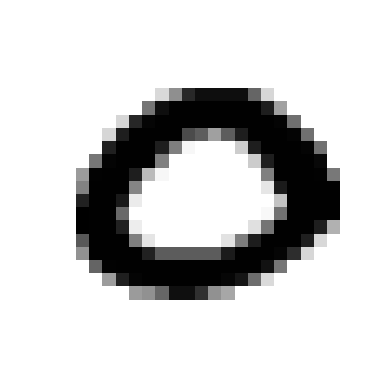

In [7]:
test_image_copy = test_img.copy()
showimage(test_image_copy, 1236)

##### Scale data

In [8]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

##### PCA operation

In [9]:
# Make an instance of the Model. Variance %95
pca = PCA(.95)

In [10]:
pca.fit(train_img)

PCA(n_components=0.95)

In [11]:
# by protecting %95 variance, datasets' sizes decreased 784 to 327

pca.n_components_

327

In [12]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

## Logistic Regression

In [13]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

##### train logisticRegr with train data

In [14]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

##### Recognation handwriting with ML

In [15]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

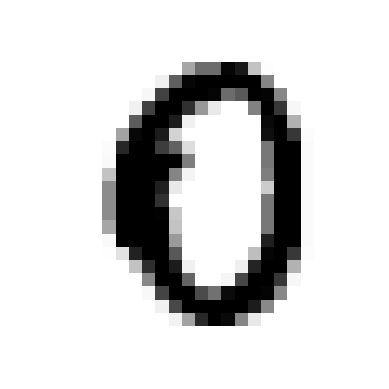

In [17]:
showimage(test_image_copy, 0)

In [18]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

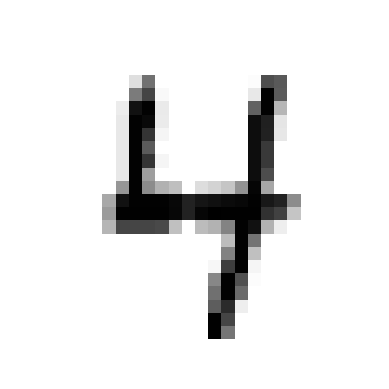

In [19]:
showimage(test_image_copy, 1)

In [20]:
logisticRegr.predict(test_img[9900].reshape(1,-1))

array(['8'], dtype=object)

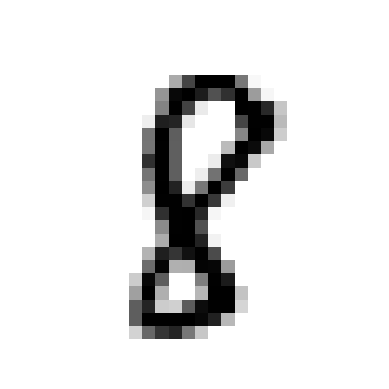

In [21]:
showimage(test_image_copy, 9900)

In [22]:
logisticRegr.predict(test_img[9999].reshape(1,-1))

array(['0'], dtype=object)

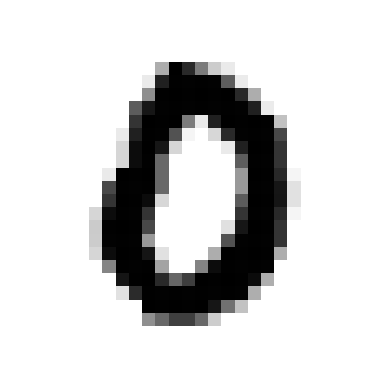

In [23]:
showimage(test_image_copy, 9999)

## Measure Accurracy

In [24]:
logisticRegr.score(test_img, test_lbl)

0.9184

In [25]:
# This ML model works with %91.84 accurracy